# Interacting with cube data

## File I/O
The core `CubeData` object now directly recognizes FITS files using to AstroPy's IO registry.

In [5]:
# Import CubeData object along with some iPython widgetry
import sys
cube_tools_path = "/Users/nearl/projects/cube-tools"
sys.path.insert(0, cube_tools_path)
from cube_tools import CubeData

from IPython.html import widgets # Widget definitions
from IPython.display import display # Used to display widgets in the notebook

%pylab inline
pylab.rcParams['figure.figsize'] = (12.0, 8.0)

Populating the interactive namespace from numpy and matplotlib


:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
%%capture
# Create our CubeData object
my_data = CubeData.read("/Users/nearl/Downloads/Cube_IFU_cube_MON-COMBO-IFU-05_8409_jlab85.fits")

In [3]:
# Define callable for iPython widgets
def cube_slice_plotter(wl):
    f, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(my_data[wl, :, :].data, interpolation='none')
    ax1.set_title("Data")
    ax2.imshow(my_data[wl, :, :].uncertainty.array, interpolation='none')
    ax2.set_title("Uncertainty")
    plt.show()

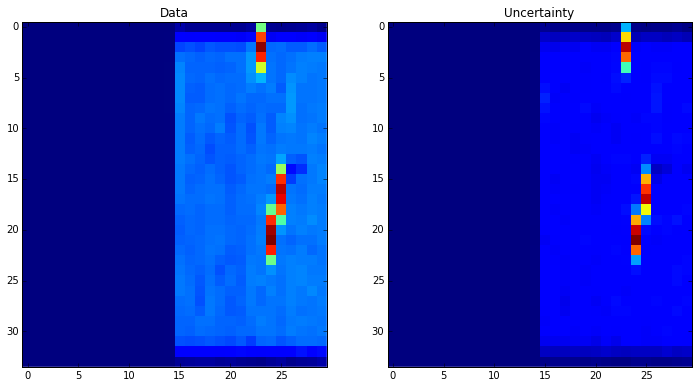

In [4]:
# Show CubeData; allow for sliding through the data cube along wavelength axis
widgets.interact(cube_slice_plotter, wl=(0, my_data.data.shape[0]-1))

## Arithmetic
Arithmetic operations have also been implemented for working with CubeData objects. Let's see what the corner of our cube looks like right now.

In [5]:
my_data[0, 0, 0]

<Quantity -11266306048.0 Jy / Angstrom>

### Operations with basic types

In [6]:
# Addition
my_data += 2e10
my_data[0, 0, 0]

<Quantity 8733693952.0 Jy / Angstrom>

In [7]:
# Multiplication
my_data *= 2
my_data[0, 0, 0]

<Quantity 8733693954.0 Jy / Angstrom>

### Operations with other CubeData objects

In [7]:
my_data = CubeData.read("/Users/nearl/Downloads/Cube_IFU_cube_MON-COMBO-IFU-05_8409_jlab85.fits")
my_other_data = CubeData.read("/Users/nearl/Downloads/Cube_IFU_cube_MON-COMBO-IFU-05_8409_jlab85.fits")

In [11]:
# Addition
new_data = my_data + my_other_data

print("""
Original value at [0, 0, 0] for my_data:       {}
Original value at [0, 0, 0] for my_other_Data: {}
New value at [0, 0, 0] for new_data:           {}
""".format(my_data[0, 0 ,0], my_other_data[0, 0, 0], new_data[0, 0, 0]))

INFO:astropy:The uncertainty classes used do not support the propagation of correlated errors, so uncertainties will be propagated assuming they are uncorrelated


INFO: The uncertainty classes used do not support the propagation of correlated errors, so uncertainties will be propagated assuming they are uncorrelated [astropy.nddata.mixins.ndarithmetic]

Original value at [0, 0, 0] for my_data:       -11266306048.0 Jy / Angstrom
Original value at [0, 0, 0] for my_other_Data: -11266306048.0 Jy / Angstrom
New value at [0, 0, 0] for new_data:           -22532612096.0 Jy / Angstrom



### Collapsing cube

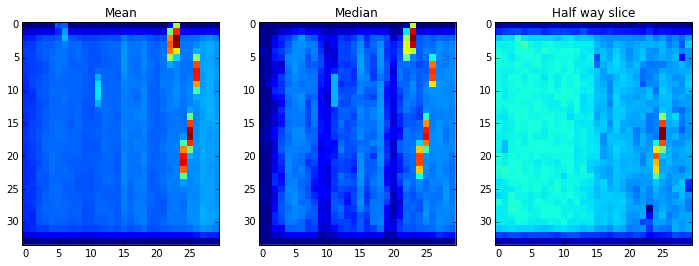

In [10]:
f, (ax1, ax2, ax4) = plt.subplots(1, 3)

# mean
ax1.imshow(my_data.collapse(method="mean").data, interpolation='none')
ax1.set_title("Mean")

# Median
ax2.imshow(my_data.collapse(method="median").data, interpolation='none')
ax2.set_title("Median")

# Half way slice
ax4.imshow(my_data[my_data.data.shape[0] * 0.5, :, :].data, interpolation='none')
ax4.set_title("Half way slice")